In [1]:
import os
import sys


import h5py
import numpy as np
import pandas as pd

In [2]:
from scipy import stats
from scipy.stats import mannwhitneyu

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from ipywidgets import widgets

In [5]:
from joblib import Parallel, delayed

# Get the data

In [6]:
path_metadata = '/data/longterm/10/athira/paper_tierpsy_behavior_v0/metadata/20210209_metadata_1743_of_4086_exps.pickle'

In [7]:
df_metadata = pd.read_pickle(path_metadata)

In [8]:
np.unique([fn.split('_')[4] for fn in df_metadata.filename.to_list()])

array(['AA', 'Alphamethyl', 'Chlorpromazine', 'Clomipramine', 'Dopamine',
       'Fluoxetine', 'Imipramine', 'Methiothepin', 'Mianserin', 'None',
       'Octopamine', 'Paroxetine', 'Phentolamine', 'Quinpirole0003',
       'Quinpirole003', 'Raclopride', 'Serotonin', 'Tyramine'],
      dtype='<U14')

In [9]:
df_features = pd.read_pickle('/data/longterm/10/athira/July17_features_combined_noLightStimuli.pickle')

In [10]:
df_features.reset_index(drop=True, inplace=True)
df_features

,frames,filename,drug,light,curv_head,speed_x_head,speed_y_head,speed_head,tan_head,angvel_head,...,rel_tan_tail_mid,rel_tan_tail_post_mid,rel_tan_tail_tip,ects_1,ects_2,ects_3,ects_4,ects_5,ects_6,quirkness
0,7,20180919_115015_1_5m0s_None_None_None_INVERTED...,None,None,-0.017198,-27.008057,-0.536011,27.013375,1.728838,-1.680707,...,-0.965574,-1.442325,4.191924,-0.242226,0.252907,0.100737,-0.103630,-0.036702,0.040370,0.942960
1,8,20180919_115015_1_5m0s_None_None_None_INVERTED...,None,None,-0.022632,-25.689758,-1.873779,25.758003,0.048131,-1.680707,...,0.737270,0.893605,0.906057,0.171081,0.179248,-0.096917,0.017548,0.020535,-0.006624,0.980586
2,9,20180919_115015_1_5m0s_None_None_None_INVERTED...,None,None,-0.013683,0.178772,12.000000,12.001332,5.897407,5.849276,...,0.261397,-5.556279,-4.919775,0.135002,-0.094772,-0.126590,0.110299,0.006492,0.022628,0.971257
3,20,20180919_115015_1_5m0s_None_None_None_INVERTED...,None,None,-0.016047,-5.867770,-1.454545,6.045364,0.244842,-0.513870,...,5.793753,5.687008,5.740084,-0.072909,-0.066518,0.017333,0.002223,-0.083971,0.042877,0.992129
4,23,20180919_115015_1_5m0s_None_None_None_INVERTED...,None,None,0.005098,-4.011912,0.333333,4.025736,6.239577,1.998245,...,-5.994454,-6.180219,-0.169155,0.020776,0.112950,-0.028227,0.071771,0.060161,-0.024482,0.998460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18013993,8996,20180808_112130_1_5m0s_Dopamine_None_None_skel...,Dopamine,None,0.003221,1.000000,-0.320496,1.050104,4.798446,-0.000824,...,-0.887769,-1.041476,-1.033917,-0.098597,-0.030548,-0.014418,-0.033454,0.025632,0.009221,0.970947
18013994,8997,20180808_112130_1_5m0s_Dopamine_None_None_skel...,Dopamine,None,0.005596,0.000000,0.047180,0.047180,4.765812,-0.032634,...,-0.788512,-0.950782,-1.077892,-0.101701,-0.016822,0.003646,-0.022406,0.032891,0.016292,0.968614
18013995,8998,20180808_112130_1_5m0s_Dopamine_None_None_skel...,Dopamine,None,0.003030,-0.669434,0.529572,0.853573,4.788003,0.022191,...,-0.810796,-1.024025,-1.074564,-0.099125,-0.022143,-0.006314,-0.039338,0.031269,0.008395,0.971154
18013996,8999,20180808_112130_1_5m0s_Dopamine_None_None_skel...,Dopamine,None,-0.007859,1.000000,0.545929,1.139315,4.793839,0.005836,...,-0.866849,-1.047440,-1.126085,-0.095032,0.007813,-0.011771,-0.047995,0.043870,0.013303,0.967644


In [11]:
df_features_combined = pd.merge(df_features, df_metadata[['filename','good_694', 'drugs_899']], left_on=['filename'], right_on=['filename'],
        left_index=True, how='left' )


In [12]:
df_meta = df_metadata[(df_metadata['good_694'] == True) | (df_metadata['drugs_899'] == True)]

In [13]:
df_feats = df_features_combined[(df_features_combined['good_694'] == True) | (df_features_combined['drugs_899'] == True)] 

In [14]:
params_list = df_features.columns.to_list()

In [15]:
speed_xys = ['speed_x_head', 'speed_y_head','speed_x_neck', 'speed_y_neck','speed_x_tail_base', 'speed_y_tail_base',
 'speed_x_tail_pre_mid', 'speed_y_tail_pre_mid','speed_x_tail_mid', 'speed_y_tail_mid',
 'speed_x_tail_post_mid', 'speed_y_tail_post_mid','speed_x_tail_tip', 'speed_y_tail_tip']
for sp_ in speed_xys:
    params_list.remove(sp_)

In [16]:

params_list.remove('frames')
params_list.remove('filename')
params_list.remove('drug')
params_list.remove('light')
# print(params_list)

In [17]:
short_params_list =  ['curv_neck',
'curv_tail_base',
'curv_tail_pre_mid',
'curv_tail_mid',
'curv_tail_post_mid',
'curv_tail_tip',
'rel_tan_neck',
'rel_tan_tail_base',
'rel_tan_tail_pre_mid',
'rel_tan_tail_mid',
'rel_tan_tail_post_mid',
'rel_tan_tail_tip',
'ects_1',
'ects_2',
'ects_3',
'ects_4',
'ects_5',
'ects_6',
'quirkness',
'speed_neck',
'speed_tail_base',
'speed_tail_pre_mid',
'speed_tail_mid',
'speed_tail_post_mid',                                       
'speed_tail_tip']

In [18]:
# short_params_list = sorted(short_params_list)


In [19]:
# params = sorted(params_list)

In [20]:
drugs_list = list(df_feats.drug.unique())
# drugs_list.remove('AA')
drugs_list.remove('None')
drugs_list.remove('Octopamine')
drugs_list.remove('Tyramine')
drugs_list.remove('Quinpirole0003')
drugs_list

['Raclopride',
 'Paroxetine',
 'Fluoxetine',
 'Methiothepin',
 'Clomipramine',
 'Serotonin',
 'Alphamethyl',
 'Dopamine',
 'Imipramine',
 'Chlorpromazine',
 'AA',
 'Phentolamine',
 'Mianserin',
 'Quinpirole003']

In [ ]:
short_drugs_list = ['Clomipramine',
 'Methiothepin',
 'Chlorpromazine',
 'Imipramine',
 'Mianserin',
 'Fluoxetine',
 'Phentolamine']

In [21]:
drugs_ = [drug for drug in reversed(short_drugs_list)] + ['None'] + ['Raclopride']

NameError: name 'short_drugs_list' is not defined

# Significance tests

In [ ]:
def get_results_mannwhitney(drug, params_list, _tail, flag = 'pval'):
    
    pvalues_dict = {}
    pvalues_dict['drug'] = drug
    
    if drug == 'Dopamine':
        control = 'AA'
    else:
        control = 'None'
    
    n1 = len(df_feats[df_feats["drug"] == drug].index)
    n2 = len(df_feats[df_feats["drug"] == control].index)
    
    for param in params_list:
        
        results = mannwhitneyu(*[df_feats[param][df_feats["drug"] == group].values 
                         for group in [control,drug]], alternative= _tail)
        
        if flag =='pval':
            pvalues_dict[param] = results[-1]
        elif flag =='ustat':
            pvalues_dict[param] = results[0]
        elif flag =='eff':
            pvalues_dict[param] = results[0]/(n1*n2)
        else:
            pvalues_dict[param] = 'None'
            
        
    return pvalues_dict

In [ ]:
# @widgets.interact_manual
# def plot_mwu_stats(stat_type = ['pval','ustat','eff'], _tail = ['two-sided','less','greater']):
    
#     mwu_results_list = Parallel(n_jobs= 7, verbose = 5)(delayed(get_results_mannwhitney)(drug, short_params_list, _tail, flag=stat_type) 
#                                                               for drug in short_drugs_list)
#     df_mwu_results = pd.DataFrame(mwu_results_list)
#     df_mwu_results.set_index('drug', inplace = True)
    
#     df_mwu_results.to_pickle(f'./Data/drugs_screening_stats/{stat_type}_{_tail}.pickle')

    
#     return None

In [ ]:
@widgets.interact_manual
def plot_mwu_stats(stat_type = ['pval','ustat','eff'], _tail = ['two-sided','less','greater']):
    
    mwu_results_list = Parallel(n_jobs= len(drugs_list) , verbose = 5)(delayed(get_results_mannwhitney)(drug, short_params_list, _tail, flag=stat_type) 
                                                              for drug in drugs_list)
    df_mwu_results = pd.DataFrame(mwu_results_list)
    df_mwu_results.set_index('drug', inplace = True)
    
    df_mwu_results.to_pickle(f'./Results_30072021/drugs_pvals_all/{stat_type}_{_tail}.pickle')

    
    return None

In [ ]:
writer = pd.ExcelWriter('./Results_30072021/results_mannwhitneyu_drugs_all.xlsx', engine='openpyxl')

In [ ]:
list(next(os.walk('./Results_30072021/drugs_pvals_all/')))[-1]

In [ ]:
@widgets.interact_manual
def plot_mwu_stats(filename = list(next(os.walk('./Results_30072021/drugs_pvals_all/')))[-1]):
    
    sheet_name = filename.split('.pi')[0]
    df = pd.read_pickle(f'./Results_30072021/drugs_pvals_all/{filename}')
    df.to_excel(writer, sheet_name=sheet_name)
    writer.save()

In [ ]:
def get_results_mannwhitney(drug, params_list, _tail, flag = 'pval'):
    
    
    n = len(df_feats[df_feats["drug"] == drug].index)
        
    return n

In [ ]:
drug_framecount ={}

In [ ]:
for i, drug in enumerate(drugs_list):
    
    n = len(df_feats[df_feats["drug"] == drug].index)
    drug_framecount[drug] = n
drug_framecount['None'] = len(df_feats[df_feats["drug"] == 'None'].index)

In [ ]:
drug_framecount

In [ ]:
frame_count = pd.DataFrame.from_records(data=drug_framecount, index=['frame_count'])

In [ ]:
frame_count.to_csv('./Results_30072021/n_frames_drugs.csv')

# SMD and SSMD

## SSMD

In [ ]:
df_means = df_feats.groupby(by='drug', as_index=True)[params_list].mean()
df_var = df_feats.groupby(by='drug', as_index=True)[params_list].var()

In [ ]:
df_std = df_feats.groupby(by='drug', as_index=True)[params_list].std()

In [ ]:
short_params_list

In [25]:
abb_dict = {'curv_neck':'cN',
 'curv_tail_base':'cTB',
 'curv_tail_pre_mid':'cTprM',
 'curv_tail_mid':'cTM',
 'curv_tail_post_mid':'cTpoM',
 'curv_tail_tip':'cTT',
 'rel_tan_neck':'rtaN',
 'rel_tan_tail_base':'rtaTB',
 'rel_tan_tail_pre_mid':'rtaTprM',
 'rel_tan_tail_mid':'rtaTM',
 'rel_tan_tail_post_mid':'rtaTpoM',
 'rel_tan_tail_tip':'rtaTT',
 'ects_1':'EC1',
 'ects_2':'EC2',
 'ects_3':'EC3',
 'ects_4':'EC4',
 'ects_5':'EC5',
 'ects_6':'EC6',
 'quirkness':'Quirkiness',
 'speed_neck':'sN',
 'speed_tail_base':'sTB',
 'speed_tail_pre_mid':'sTprM',
 'speed_tail_mid':'sTM',
 'speed_tail_post_mid':'sTpoM',
 'speed_tail_tip':'sTT'}

In [ ]:
drugs_all = drugs_list + ['None']

In [ ]:
df_means.loc[drugs_all][short_params_list].rename(abb_dict, axis='columns').to_excel('./Results_30072021/mean_violinplots_drugs.xlsx')

In [ ]:
writer_11 = pd.ExcelWriter('./Results_30072021/meanstd_violinplots_drugs_all.xlsx', engine='openpyxl')

# Write each dataframe to a different worksheet.
df_means_short = df_means.loc[drugs_all][short_params_list].rename(abb_dict, axis='columns')
df_std_short = df_std.loc[drugs_all][short_params_list].rename(abb_dict, axis='columns')

df_means_short.to_excel(writer_11, sheet_name='mean')
df_std_short.to_excel(writer_11, sheet_name='std')

# Close the Pandas Excel writer and output the Excel file.
writer_11.save()

In [ ]:
list_ssmd_dicts = []
for param in short_params_list:
    
    ssmd_dict = {}
    ssmd_dict['param'] = param
    
    control_mean = df_means.loc['None'][param]
    control_var = df_var.loc['None'][param]
    
    for drug in drugs_list:
        
        if drug == 'Dopamine':
            
            control_mean = df_means.loc['AA'][param]
            control_var = df_var.loc['AA'][param]
            
        else :
            control_mean = df_means.loc['None'][param]
            control_var = df_var.loc['None'][param]
    
        drug_mean = df_means.loc[drug][param]
        drug_var = df_var.loc[drug][param]
        
        ssmd_dict[drug] = (drug_mean - control_mean) / np.sqrt(drug_var + control_var)
        
    list_ssmd_dicts.append(ssmd_dict)
        
    

In [ ]:
ssmd_df  = pd.DataFrame(list_ssmd_dicts).set_index('param')

In [ ]:
ssmd_df.rename(index=abb_dict, inplace=True)

In [ ]:
ssmd_df.index

In [ ]:
max_lim = max(np.abs(ssmd_df.min().min()), ssmd_df.max().max())

In [ ]:

# fig, axes = plt.subplots(3,1, figsize = (15, 30))
# h1 = sns.heatmap(ssmd_df.loc[short_params_list][short_drugs_list].T, cmap= 'bwr', 
#             square=True, ax=axes[0], center=0, cbar = True, robust=True,
#             cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40))
# h2 = sns.heatmap(ssmd_df.loc[short_params_list][short_drugs_list].T, cmap= 'bwr', 
#             square=True, ax=axes[1], center=0, cbar = True,
#             cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40))

# h3 = sns.heatmap(ssmd_df.loc[short_params_list][short_drugs_list].T, cmap= 'bwr', 
#             square=True, ax=axes[2], center=0, cbar = True, vmax = max_lim, vmin = -1*max_lim,
#             cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40))

# axes[0].set_title('Heatmap parameters: center = 0 and robust = True')
# axes[1].set_title('Heatmap parameters: center = 0')
# axes[1].set_title(f'Heatmap parameters: center = 0, vmax = ')
# # fig.savefig('./Figures/heatmap_robust_test.svg')

In [ ]:
# fig.savefig('./Figures/heatmap_robust_test.png')

In [ ]:
ssmd_df['AA']

In [ ]:

fig, axes = plt.subplots(1,1, figsize = (15, 15))
sns.heatmap(ssmd_df[drugs_list].T, cmap= 'bwr', 
            square=True, ax=axes, center=0, cbar = True,
            cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40, pad = 0.2))
axes.set_title('Strictly standardized mean difference')

# fig.savefig('./Figures/ssmd_smd/ssmd_drugs_subset.svg')

In [ ]:

fig, axes = plt.subplots(1,1, figsize = (15, 15))
sns.heatmap(ssmd_df[drugs_list].T, cmap= 'bwr', 
            square=True, ax=axes, center=0, cbar = True,
            cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40, pad = 0.2))
axes.set_title('Strictly standardized mean difference')

for _, spine in axes.spines.items():
    spine.set_visible(True)
fig.savefig('./Results_30072021/Fig2/ssmd_drugs_all.svg')

In [ ]:

# fig, axes = plt.subplots(1,1, figsize = (15, 15))
g1 = sns.clustermap(ssmd_df[drugs_list].T, cmap= 'bwr', 
               col_cluster=False, figsize=(15,10),
            square=True, center=0, cbar = True,
                    cbar_pos=(0, .1, .03, .4),
            cbar_kws = dict(use_gridspec=False,shrink=0.10, pad = 0.2))
# axes.set_title('Strictly standardized mean difference')

g1.fig.suptitle('Strictly standardized mean difference')
g1.savefig('./Results_30072021/Fig2/ssmd_drugs_all_clustermap.svg')

## SMD

In [19]:
df_medians = df_feats.groupby(by='drug', as_index=True)[params_list].median()
df_mad = df_feats.groupby(by='drug', as_index=True)[params_list].mad()

In [20]:
list_smd_dicts = []
for param in short_params_list:
    
    smd_dict = {}
    smd_dict['param'] = param
    
    
    
    for drug in drugs_list:
        
        if drug == 'Dopamine':
            control_median = df_medians.loc['AA'][param]
            control_mad = df_mad.loc['AA'][param]
            
        else:
            control_median = df_medians.loc['None'][param]
            control_mad = df_mad.loc['None'][param]
                
        
        drug_median = df_medians.loc[drug][param]
        drug_mad = df_mad.loc[drug][param]
        
        smd_dict[drug] = (drug_median - control_median) / (drug_mad + control_mad)
        
    list_smd_dicts.append(smd_dict)
        
    

In [21]:
smd_df  = pd.DataFrame(list_smd_dicts).set_index('param')

In [22]:
smd_df

,Raclopride,Paroxetine,Fluoxetine,Methiothepin,Clomipramine,Serotonin,Alphamethyl,Dopamine,Imipramine,Chlorpromazine,AA,Phentolamine,Mianserin,Quinpirole003
param,,,,,,,,,,,,,,
curv_neck,-0.069129,0.013236,-0.216368,0.211698,0.132143,0.035130,-0.047527,-0.129778,0.070873,0.012401,0.028718,0.082417,-0.080187,-0.163338
curv_tail_base,-0.063053,0.230006,-0.022468,0.163274,0.059212,-0.020362,-0.175913,-0.047713,0.066375,0.059530,-0.081625,0.173077,-0.111102,-0.128220
curv_tail_pre_mid,-0.073749,0.357629,-0.066225,0.088307,0.039766,-0.055939,-0.178131,-0.056604,0.186205,0.034862,-0.049449,0.244835,-0.062251,-0.142188
curv_tail_mid,-0.102880,0.311758,-0.071134,0.066926,0.042689,0.002904,0.005967,-0.067858,0.115837,0.040881,-0.011782,0.040383,0.017029,-0.051213
curv_tail_post_mid,-0.146768,0.088420,-0.108129,0.046463,-0.050575,-0.080405,-0.007812,-0.065933,0.044869,0.013284,0.051660,-0.035474,-0.039314,-0.185489
curv_tail_tip,-0.111536,-0.044732,-0.070392,-0.064293,0.025998,0.013133,0.075813,-0.106593,-0.052997,0.004544,0.019083,0.011393,0.085583,-0.128898
rel_tan_neck,0.051501,-0.060519,-0.032286,0.049483,0.034385,0.033422,0.007331,-0.042697,0.027117,0.029296,0.044074,-0.024909,0.045778,0.002636
rel_tan_tail_base,0.000322,-0.024223,-0.123225,0.053666,0.071686,0.059582,-0.025459,-0.074443,0.044407,-0.012238,0.051786,0.067116,-0.024710,-0.063953
rel_tan_tail_pre_mid,-0.073469,0.041550,-0.143205,0.077364,0.061453,0.050657,-0.063509,-0.055609,0.061007,0.036865,0.011236,0.038992,-0.053610,-0.061948


In [23]:
short_params_list

['curv_neck',
 'curv_tail_base',
 'curv_tail_pre_mid',
 'curv_tail_mid',
 'curv_tail_post_mid',
 'curv_tail_tip',
 'rel_tan_neck',
 'rel_tan_tail_base',
 'rel_tan_tail_pre_mid',
 'rel_tan_tail_mid',
 'rel_tan_tail_post_mid',
 'rel_tan_tail_tip',
 'ects_1',
 'ects_2',
 'ects_3',
 'ects_4',
 'ects_5',
 'ects_6',
 'quirkness',
 'speed_neck',
 'speed_tail_base',
 'speed_tail_pre_mid',
 'speed_tail_mid',
 'speed_tail_post_mid',
 'speed_tail_tip']

In [26]:
smd_df.rename(index=abb_dict, inplace=True)

In [27]:
dest_folder_oct18 = '/data/temp/athira/oct18_violinplots_rescaled'


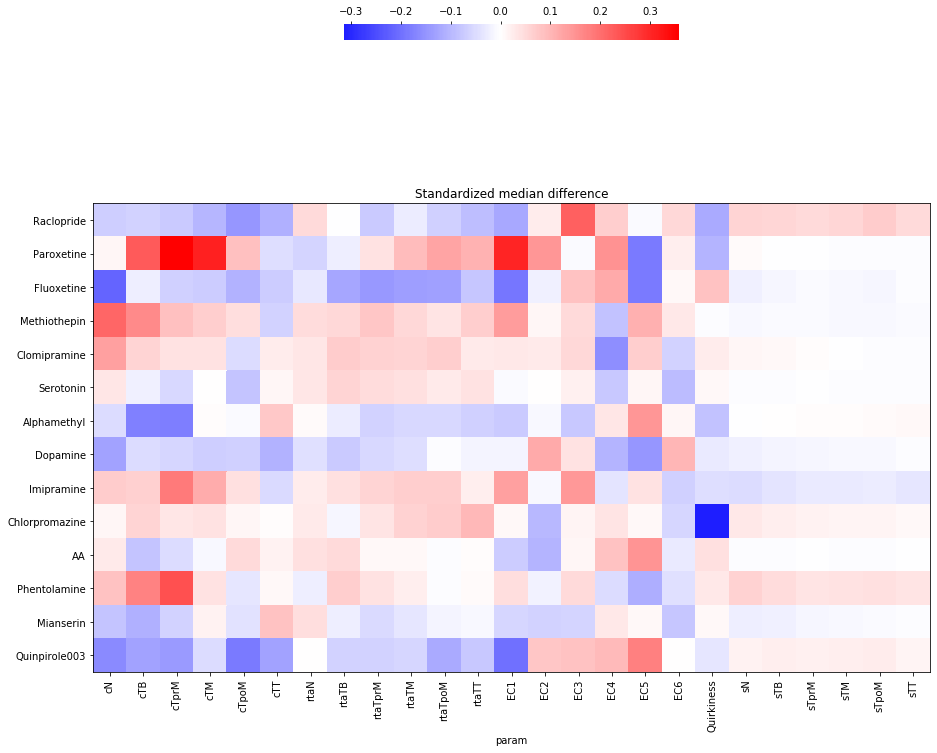

In [28]:

fig, axes = plt.subplots(1,1, figsize = (15, 15))
sns.heatmap(smd_df.T, cmap= 'bwr', 
            square=True, ax=axes, center=0, cbar = True,
            cbar_kws = dict(use_gridspec=False,location="top", shrink=0.40, pad = 0.2))
axes.set_title('Standardized median difference')
for _, spine in axes.spines.items():
    spine.set_visible(True)
fig.savefig(os.path.join(dest_folder_oct18,'smd_drugs_allbut3q.svg'))

/share/python-virtual-environments/ciona_behaviour-v2/lib/python3.8/site-packages/seaborn/matrix.py:1216: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


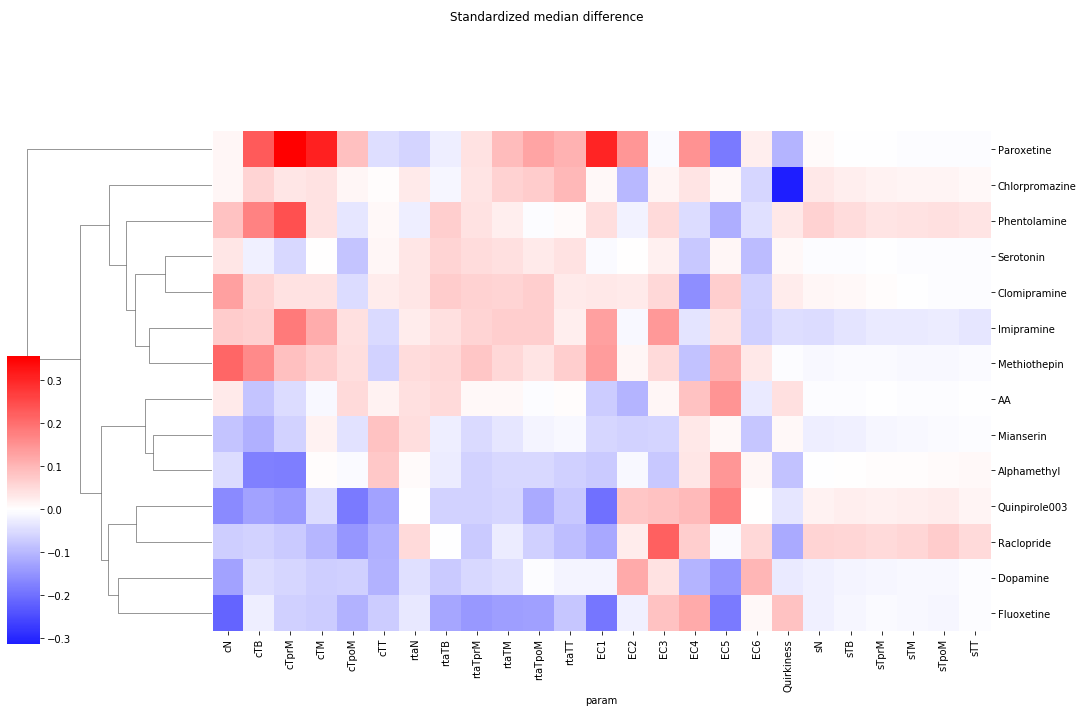

In [29]:
g2 = sns.clustermap(smd_df[reversed(drugs_list)].T, cmap= 'bwr', 
            square=True, center=0, cbar = True,
                  figsize=(15,10), col_cluster=False,
                    cbar_pos=(0, .1, .03, .4),
            cbar_kws = dict(use_gridspec=False, shrink=0.10, pad = 0.2))
# axes = fig.get
g2.fig.suptitle('Standardized median difference')
g2.savefig(os.path.join(dest_folder_oct18,'smd_drugs_allbut3q_clustermap.svg'))
# for _, spine in axes.spines.items():
#     spine.set_visible(True)

## Save SMD and SSMD as excel datasheets

In [ ]:
smd_df

In [ ]:
writer_2 = pd.ExcelWriter('./Results_30072021/smd_ssmd_drugs_all.xlsx', engine='openpyxl')

# Write each dataframe to a different worksheet.
ssmd_df.to_excel(writer_2, sheet_name='SSMD')
smd_df.to_excel(writer_2, sheet_name='SMD')

# Close the Pandas Excel writer and output the Excel file.
writer_2.save()

# Bubble chart for ects

In [22]:
df_ects_feats = df_feats[df_feats["drug"] == 'None'].filter(like='ects_')

In [23]:
df_ects_feats

,ects_1,ects_2,ects_3,ects_4,ects_5,ects_6
0,-0.242226,0.252907,0.100737,-0.103630,-0.036702,0.040370
0,0.171081,0.179248,-0.096917,0.017548,0.020535,-0.006624
0,0.135002,-0.094772,-0.126590,0.110299,0.006492,0.022628
0,-0.072909,-0.066518,0.017333,0.002223,-0.083971,0.042877
0,0.020776,0.112950,-0.028227,0.071771,0.060161,-0.024482
...,...,...,...,...,...,...
4077,0.068363,-0.133170,-0.007390,0.062367,-0.015942,0.014732
4077,0.004892,-0.022645,0.575269,0.179834,-0.032269,0.047252
4077,0.068533,-0.031360,0.487498,0.120751,0.013223,-0.012261
4077,0.084238,0.013878,0.478208,0.073906,0.020132,0.001979


In [24]:
df_ects_feats.sum(axis=1)

0       0.011455
0       0.284871
0       0.053058
0      -0.160965
0       0.212950
          ...   
4077   -0.011039
4077    0.752332
4077    0.646384
4077    0.672341
4077   -0.134768
Length: 6603509, dtype: float64

In [25]:
df_ects_mean = df_feats.groupby(by=['drug'], as_index=True)['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6'].mean()

<ipython-input-25-9d162a1ddf0c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ects_mean = df_feats.groupby(by=['drug'], as_index=True)['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6'].mean()


In [26]:
df_ects_mean

,ects_1,ects_2,ects_3,ects_4,ects_5,ects_6
drug,,,,,,
AA,0.011699,-0.017214,0.011313,0.010434,0.005925,0.000615
Alphamethyl,0.016139,-0.018323,-0.001244,0.005008,0.012064,0.006606
Chlorpromazine,0.004855,-0.011627,0.013204,0.009841,0.003988,0.004875
Clomipramine,0.013971,-0.002218,0.019637,-0.005817,0.001861,-0.001327
Dopamine,-0.014026,-0.001047,0.016020,0.008132,0.000729,0.002392
Fluoxetine,-0.006899,-0.024426,0.012401,0.016833,-0.016780,-0.003396
Imipramine,0.020975,-0.011341,0.031636,-0.002820,-0.001872,0.003993
Methiothepin,0.013835,0.004921,0.025100,-0.001079,0.007254,0.003764
Mianserin,0.000795,-0.012778,0.012222,0.007626,-0.002177,0.002462


In [27]:
df_ects_mean.index.to_list()

['AA',
 'Alphamethyl',
 'Chlorpromazine',
 'Clomipramine',
 'Dopamine',
 'Fluoxetine',
 'Imipramine',
 'Methiothepin',
 'Mianserin',
 'None',
 'Octopamine',
 'Paroxetine',
 'Phentolamine',
 'Quinpirole0003',
 'Quinpirole003',
 'Raclopride',
 'Serotonin',
 'Tyramine']

In [28]:
df_ects_var = df_feats.groupby(by=['drug'], as_index=True)['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6'].var()

<ipython-input-28-69bc185e747a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ects_var = df_feats.groupby(by=['drug'], as_index=True)['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6'].var()


In [29]:
df_ects_std = df_feats.groupby(by=['drug'], as_index=True)['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6'].std()

<ipython-input-29-ca0501a7c127>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ects_std = df_feats.groupby(by=['drug'], as_index=True)['ects_1','ects_2','ects_3','ects_4','ects_5','ects_6'].std()


In [30]:
drugs_list

['Raclopride',
 'Paroxetine',
 'Fluoxetine',
 'Methiothepin',
 'Clomipramine',
 'Serotonin',
 'Alphamethyl',
 'Dopamine',
 'Imipramine',
 'Chlorpromazine',
 'AA',
 'Phentolamine',
 'Mianserin',
 'Quinpirole003']

In [46]:
drugs_list

['Raclopride',
 'Paroxetine',
 'Fluoxetine',
 'Methiothepin',
 'Clomipramine',
 'Serotonin',
 'Alphamethyl',
 'Dopamine',
 'Imipramine',
 'Chlorpromazine',
 'AA',
 'Phentolamine',
 'Mianserin',
 'Quinpirole003']

In [64]:
rev_drugs_list = list(reversed(drugs_list)) + ['None']
print(drugs_list, rev_drugs_list)

['Raclopride', 'Paroxetine', 'Fluoxetine', 'Methiothepin', 'Clomipramine', 'Serotonin', 'Alphamethyl', 'Dopamine', 'Imipramine', 'Chlorpromazine', 'AA', 'Phentolamine', 'Mianserin', 'Quinpirole003'] ['Quinpirole003', 'Mianserin', 'Phentolamine', 'AA', 'Chlorpromazine', 'Imipramine', 'Dopamine', 'Alphamethyl', 'Serotonin', 'Clomipramine', 'Methiothepin', 'Fluoxetine', 'Paroxetine', 'Raclopride', 'None']


In [32]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors


In [36]:
df_ects_mean.columns.to_list()

['ects_1', 'ects_2', 'ects_3', 'ects_4', 'ects_5', 'ects_6']

0.04407369189596104 -0.024425502604555525 0.04407369189596104


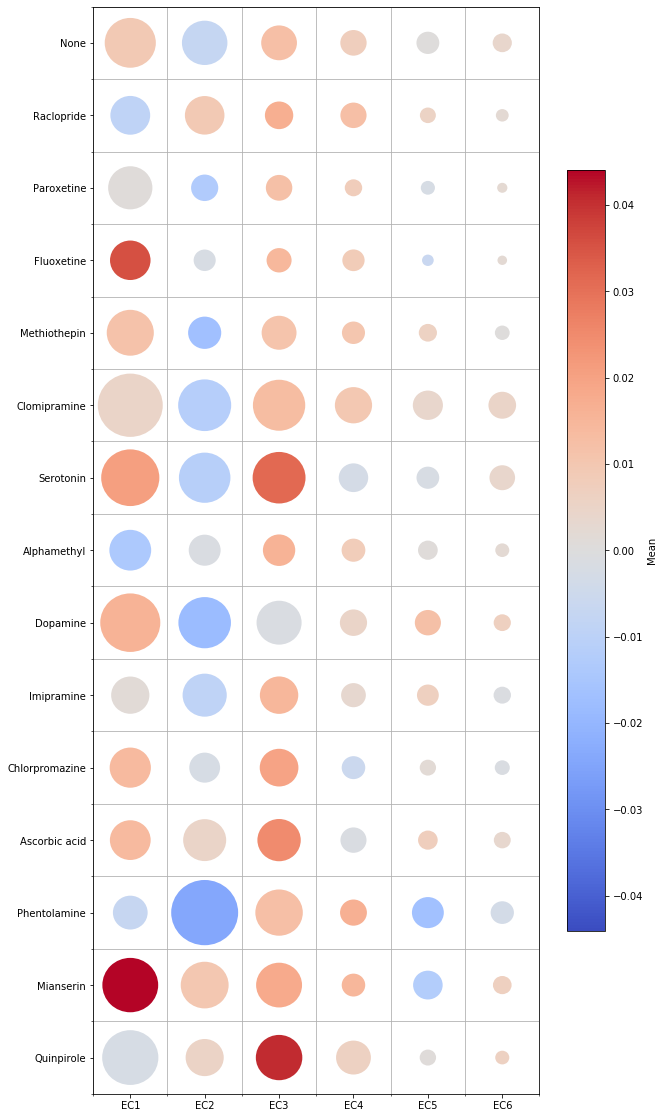

In [65]:
from matplotlib.collections import PatchCollection


ylabels = ['Ascorbic acid' if drug == 'AA' else 'Quinpirole' if drug == 'Quinpirole003' else drug 
           for drug in rev_drugs_list]
xlabels = ['EC1', 'EC2', 'EC3','EC4','EC5','EC6'] #df_ects_mean.columns.to_list()

N = len(ylabels)
M = len(xlabels)

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = df_ects_std.loc[new_drugs_list].values
c = df_ects_mean.loc[new_drugs_list].values



fig, ax = plt.subplots(figsize = (10,20))

R = s/s.max()/2
circles = [plt.Circle((j,i), radius= 0.9*r) for r,j, i, m, v in zip(R.flat, x.flat, y.flat, 
                                                                df_ects_mean.loc[rev_drugs_list].values.flat,
                                                                df_ects_std.loc[rev_drugs_list].values.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap='coolwarm')
ax.add_collection(col)
c_limit = max(-1*c.flatten().min(), c.flatten().max())
print(c_limit,c.flatten().min(), c.flatten().max())
col.set_clim(-c_limit, c_limit)
ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)

ax.grid(which='minor')

fig.colorbar(col, shrink=0.7, label='Mean')

In [66]:
fig.savefig('./ects_bubblechart_Oct29.svg')

In [ ]:
0.05/25